# Experiment 2.5
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.5'

In [55]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [56]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.5_metrics.csv", index_col=0)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.0001,32,2,1,32,96,0.051181,0.172802,9,4,0.0,204.88
1,0.0001,32,2,1,32,336,0.048824,0.166423,12,7,0.0,582.79
2,0.0001,32,2,1,64,96,0.037720,0.143410,13,6,0.2,261.88
3,0.0001,32,2,1,64,336,0.037885,0.145606,17,11,0.2,1017.93
4,0.0001,32,2,1,128,96,0.031415,0.130267,10,5,0.7,311.76
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0050,32,6,6,128,336,0.031011,0.130057,4,9,2.8,4000.52
116,0.0050,32,6,6,256,96,0.035321,0.140809,4,5,11.1,1238.59
117,0.0050,32,6,6,256,336,0.030293,0.131905,4,13,11.1,5117.27
118,0.0050,32,6,6,512,96,0.036491,0.141869,4,7,44.2,2281.85


In [57]:
hpo_table.sum(axis=0)

learning_rate         0.198000
batch_size         3840.000000
e_layers            440.000000
d_layers            400.000000
d_model           23808.000000
seq_len           25920.000000
MSE                   3.719618
MAE                  15.510192
Epochs              928.000000
Time[min]          1172.000000
Params[Mio.]        820.000000
Max_mem[MB]      200075.840000
dtype: float64

In [58]:
hpo_table.groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,,
32,0.00165,3.666667,3.333333,198.4,216.0,0.030997,0.129252,7.733333,9.766667,6.833333,1667.298667


In [59]:
hpo_table[hpo_table["MSE"]<0.08].groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,,
32,0.00165,3.666667,3.333333,198.4,216.0,0.030997,0.129252,7.733333,9.766667,6.833333,1667.298667


In [73]:
sorted_df = hpo_table.sort_values(by="MSE")
display(sorted_df)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
45,0.0005,32,3,3,128,336,0.022540,0.110274,8,10,1.4,2051.89
29,0.0001,32,6,6,512,336,0.023106,0.110987,11,61,44.2,7623.16
83,0.0010,32,6,6,64,336,0.023114,0.111765,10,20,0.7,3527.53
85,0.0010,32,6,6,128,336,0.023321,0.111899,9,20,2.8,4000.52
73,0.0010,32,3,3,64,336,0.023340,0.111743,8,9,0.4,1843.87
...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.0001,32,3,3,32,96,0.044524,0.158024,10,8,0.1,263.30
59,0.0005,32,6,6,512,336,0.048452,0.168916,4,21,44.2,7623.16
1,0.0001,32,2,1,32,336,0.048824,0.166423,12,7,0.0,582.79
11,0.0001,32,3,3,32,336,0.049332,0.167201,11,11,0.1,996.17


In [61]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0225400310009717

## Learning rate vs MSE

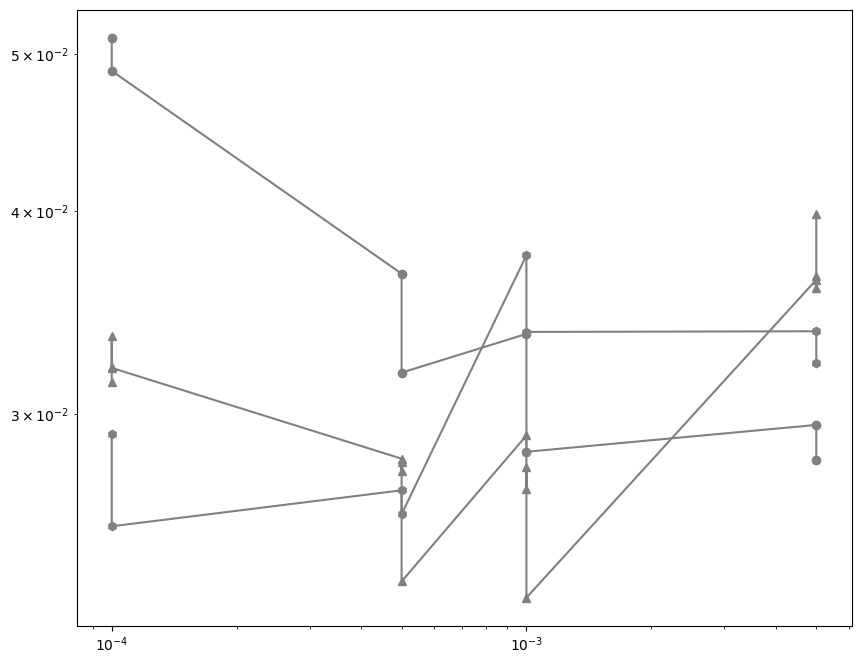

In [62]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 1.6: 's', 10.5: 'h'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.6, 0.7, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

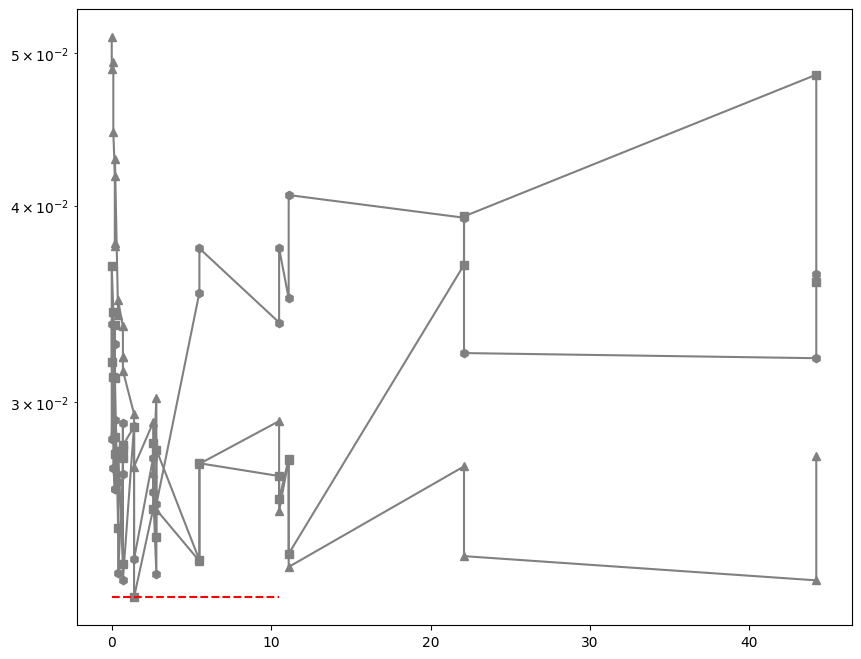

In [63]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



In [64]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
91,0.0050,32,2,1,32,336,0.028086,0.124510,7,4,0.0,582.79
61,0.0010,32,2,1,32,336,0.028432,0.124961,11,6,0.0,582.79
90,0.0050,32,2,1,32,96,0.029538,0.126754,10,5,0.0,204.88
31,0.0005,32,2,1,32,336,0.031814,0.131835,11,6,0.0,582.79
60,0.0010,32,2,1,32,96,0.033611,0.133617,9,4,0.0,204.88
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0010,32,6,6,512,96,0.031989,0.130928,4,7,44.2,2281.85
58,0.0005,32,6,6,512,96,0.035767,0.139535,4,7,44.2,2281.85
89,0.0010,32,6,6,512,336,0.036194,0.145367,4,21,44.2,7623.16
118,0.0050,32,6,6,512,96,0.036491,0.141869,4,7,44.2,2281.85


In [65]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [66]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    if ynames is None:
        ynames = column_names
    else:
        ynames = ynames

    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    print(ys.shape)

    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter
    jitter_strength = 0.0001  # Adjust this value based on your data range
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, -1] = 0  # Don't jitter the last column

    zs += jitter


    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            #ax.set_yscale('log')


    axes[-1].set_yscale('log')

    #axes[-2].set_yscale('log')
    #axes[-3].set_yscale('log')

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)

    plt.tight_layout()
    plt.show()


(120, 6)


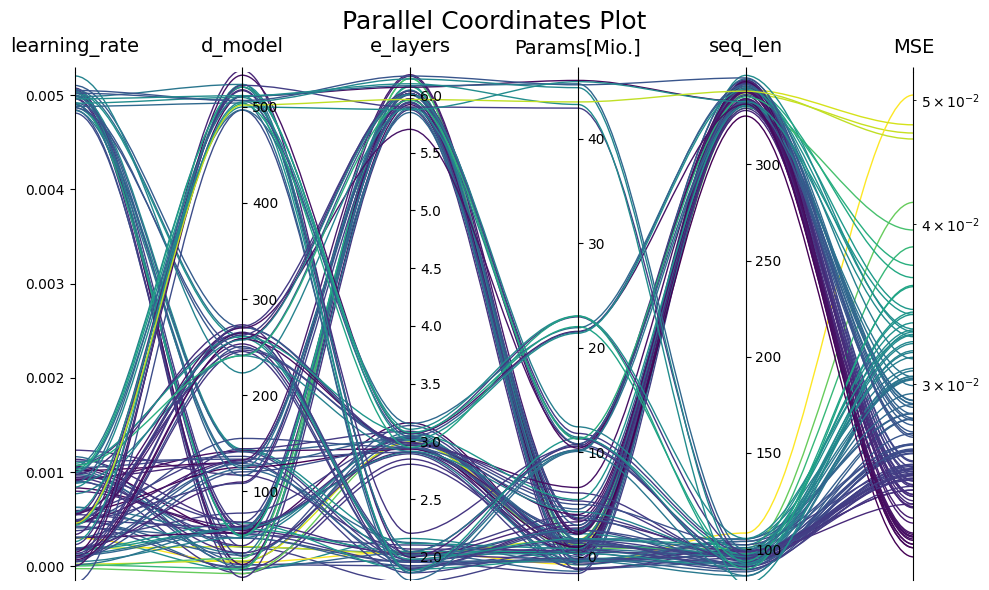

In [67]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

(64, 6)


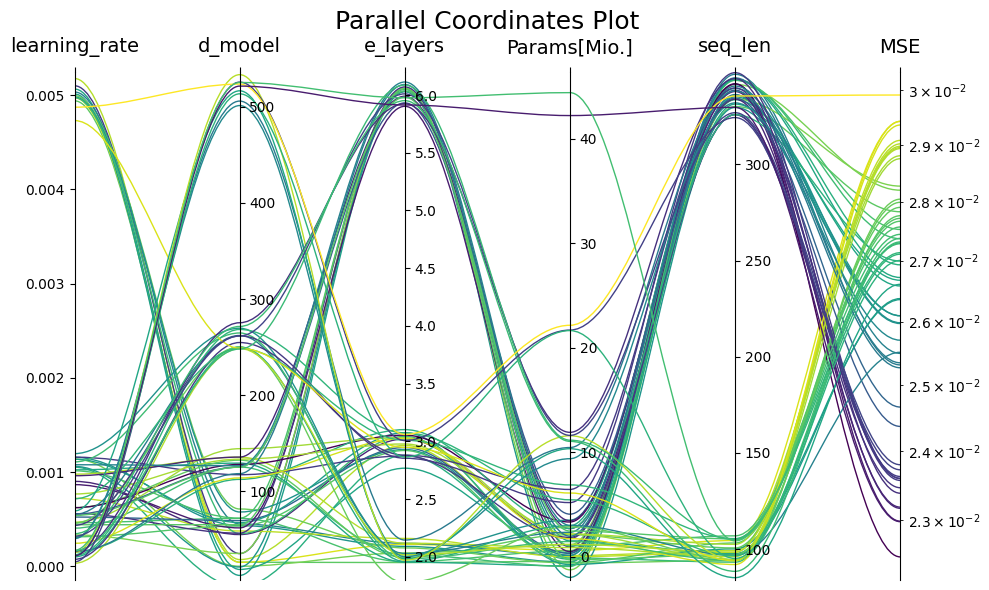

(20, 6)


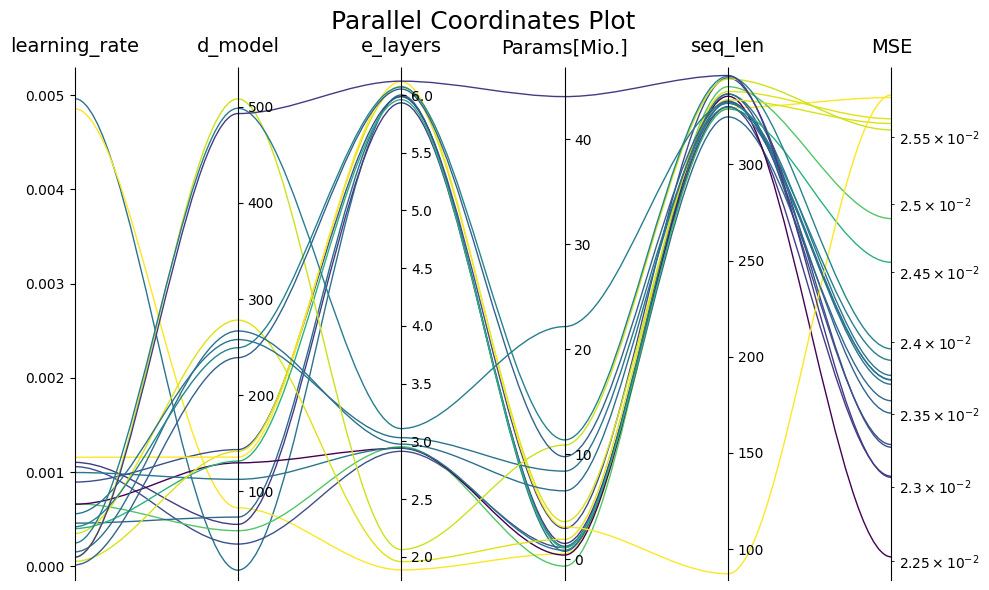

In [68]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.03)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.026)

(8, 3)


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_38342/1850949566.py:35: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_38342/1850949566.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


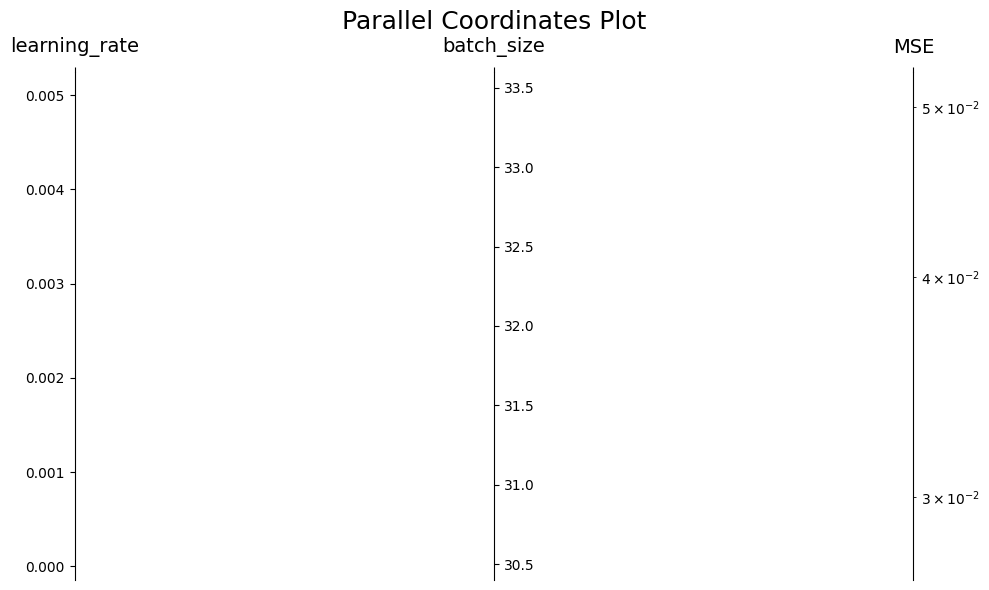

In [69]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_38342/1850949566.py:35: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


(16, 3)


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_38342/1850949566.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


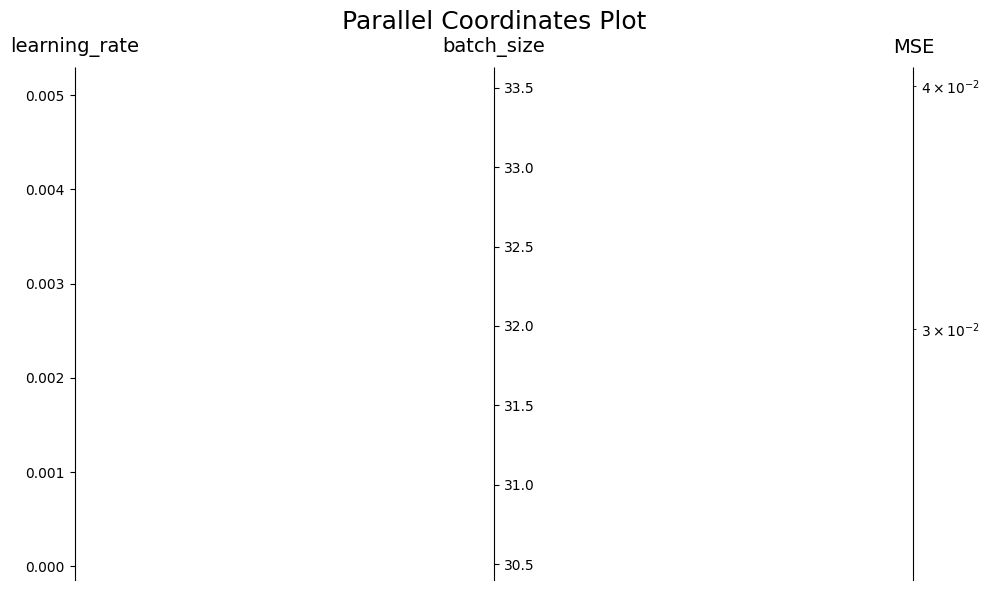

In [70]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

(0, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

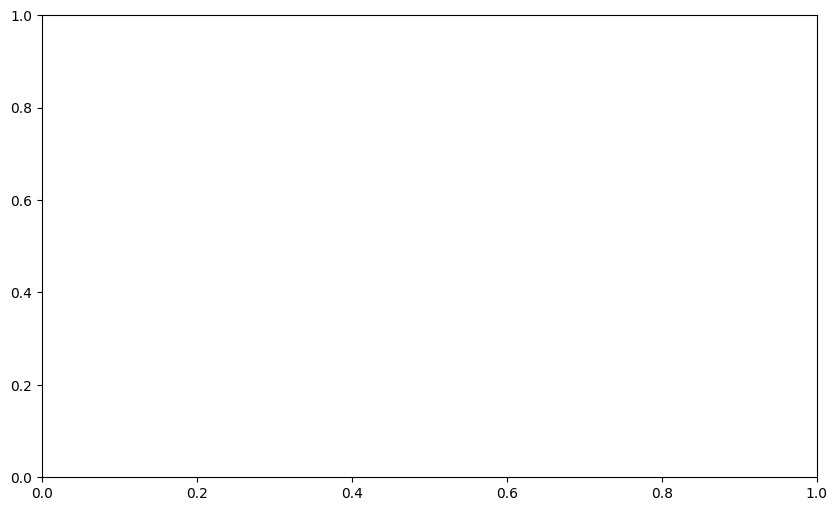

In [71]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


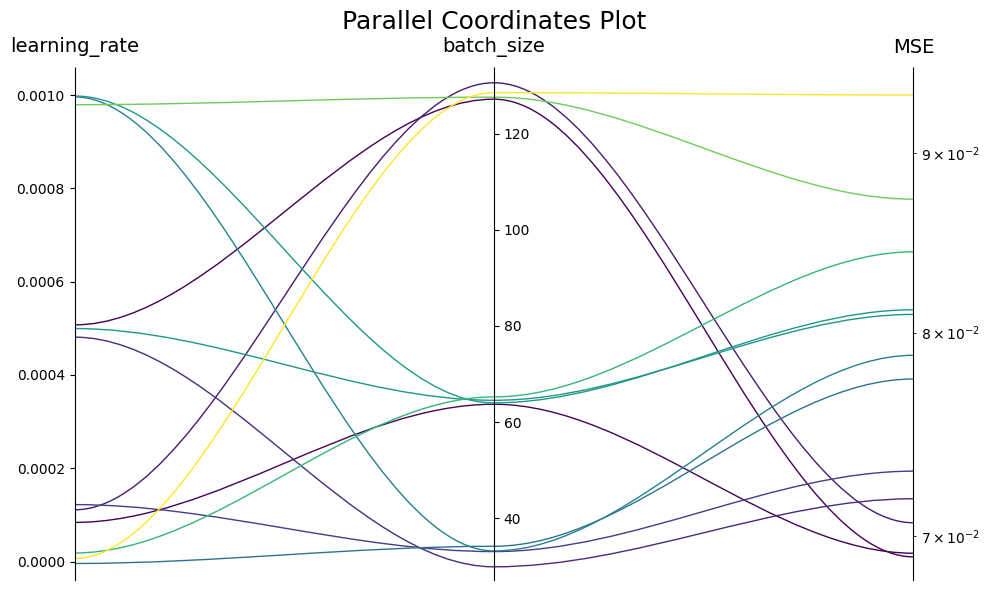

(7, 3)


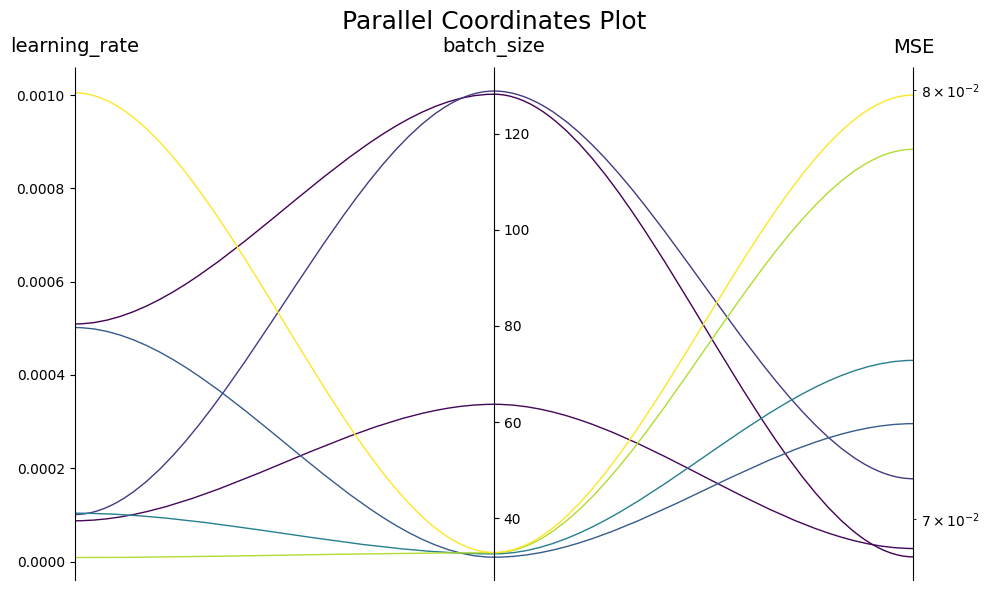

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)